# LEARNING AND MEMORY TUTORIAL
# PART I: SYNAPTIC PLASTICITY

In [2]:
# the only two python modules you will need for this tutorial are numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Part 1: Rate models of synaptic plasticity

### 1.1 The BCM rule

20 presynaptic neurons with firing rates $x_i$ connect onto the same postsynaptic neuron which fires at a rate

$$y = \sum_iw_ix_i$$

Synaptic weights change according to the BCM learning rule:

$$\frac{dw_i}{dt} = \eta y(y-\theta)x_i$$

Suppose that the presynaptic population consists of two groups of 10 neurons each that all fire together at the same rate while the other group remains silent, and that these patterns alternate on each time step (i.e., neurons 1 to 10 fire at $t=1$, neurons 11 to 20 fire at $t=2$, neurons 1 to 10 fire at $t=3$, etc.). Initially all weights $w_i$ are $1$. Weights are bounded from below, i.e., $w_i ≥ 0$.

a) The two possible input patterns are: (1) group 1 fires at 3 Hz and group 2 is quiescent; and (2) group 2 fires at 1 Hz and group 1 is quiescent. Inputs alternate between both patterns several times back and forth. Assume $\theta = 20$ Hz. How do the weights evolve?

b) Now suppose a different input pattern (2), where the second group fires at 2.5 Hz. Again, assume θ = 20 Hz. How do the weights evolve?

c) In the same situation as b, how would you make the threshold θ slide so as to allow group discrimination?

### 1.2 Oja's rule

Consider a linear neuron $y$ which receives input from a set of $N$ presynaptic neurons $\mathbf{x}\in\mathbb{R}^N$ with synaptic weights $\mathbf{w}\in\mathbb{R}^N$, such that $y = \mathbf{w}^T\mathbf{x} = \sum_iw_ix_i$. The synaptic weights change according to Oja's rule, defined as:

$$\frac{d\mathbf{w}}{dt} = \eta(y\mathbf{x} - y^2\mathbf{w})$$

a) ${\bf Stability:}$ To analyze the stability of this learning rule, let's consider the dynamics of the squared norm of the weight vector $||\mathbf{w}||^2 = \mathbf{w}^T\mathbf{w} = \sum_iw_i^2$. Find the fixed point of the dynamics of $||\mathbf{w}||^2$ and show that this learning rule is stable. What will be the value of the norm of the weights at steady-state? (Hint: write an equation for the dynamics of the norm as $\frac{d||\mathbf{w}||^2}{dt} = 2\mathbf{w}^T\frac{d\mathbf{w}}{dt}$).

b) ${\bf Average\ learning\ dynamics:}$ To better understand what this plasticity rule actually learns, let's consider the average learning dynamics over the input ensemble: $\langle \frac{d\mathbf{w}}{dt} \rangle_x$. Assume that the input ensemble has zero mean. Take the average of the plasticity rule over the input. What do you find? (Hint: you should obtain an expression with the covariance matrix again $\mathbf{C} = \langle \mathbf{xx}^T \rangle_x$ as we saw in the lecture for normal Hebbian learning!)

c) ${\bf Fixed\ points:}$ Based on the result to question (b), show that the fixed points of the equation correspond to eigenvectors of the correlation matrix $\mathbf{Q}$.

d) ${\bf Relation\ to\ PCA\ (challenge\ question!):}$ Show that the eigenvector associated with the largest eigenvalue of $\mathbf{C}$ is a stable fixed point.

$\mathbf{Hint}$:  Assume that the weight is almost aligned with the eigenvector $\mathbf{e}_k$, but slightly perturbed in the direction of a different eigenvector $\mathbf{e}_j$, i.e., 

$$\mathbf{w}(t) = \alpha(t)\mathbf{e}_k + \epsilon(t)\mathbf{e}_j,$$

with $\epsilon << 1$ and $\epsilon^2 + \alpha^2 = 1$. Plug this ansatz into Oja’s rule and show that the dynamics of $\epsilon(t)$ are given by

$$\frac{d\epsilon}{dt} = -(\lambda_k-\lambda_j)(\epsilon-\epsilon^3),$$

where $\lambda_k$ is the corresponding eigenvalue for eigenvector $\mathbf{e}_k$. Use this result to discuss the stability of the fixed point $\mathbf{e}_k$.

### 1.3 BCM rule (programming exercise)

Consider a postsynaptic neuron $y$ which receives inputs from two presynaptic neurons $\mathbf{x} = (x_1, x_2)$. Simulate the competition between two input patterns $p_1 = (20, 0)$ and $p_2 = (0, 20)$. At each timestep, one of the two patterns is presented to the neuron, the pattern is chosen randomly with a probability 0.5 of being pattern $p_1$ and 0.5 of being pattern $p_2$. The weights follow the BCM rule. The output of the neuron at each timestep is given by

$y(t) = \mathbf{w}^T\mathbf{x}(t) = w_1x_1(t) + w_2x_2(t)$

where $\mathbf{x}(t)$ is the input presented at time $t$.

Recall from the lecture that the weight update for the BCM rule is:

$\frac{d\mathbf{w}}{dt} = \frac{dw_i}{dt} = \eta y(y-\theta)\mathbf{x}$

where $\theta$ is the sliding threshold $\theta = \frac{\langle y^2 \rangle}{y_0}$. Note that the average $\langle y\rangle$ must be computed online. The threshold will therefore obey the rule

$\tau\frac{d\theta}{dt} = -\theta + \frac{y(t)^2}{y_0}$

Implement this simulation using a total time $T = 10$s, $\eta = 10^{−6}$ms$^{−1}$, $y_0 = 10$, $\tau = 50$ms. Use the Euler method with a timestep of $1ms$. You should also put a hard bound for the weights at $0$ (when $w_i < 0$, set it to $0$). Plot the weights $\mathbf{w}$, the sliding threshold $\theta$ and the output $y$.

Run the simulation a few times. Does it always produce the same result?

In [3]:
# PARAMETERS AND SETUP
# (already implemented, just run)

T = 10000
eta = 1e-6
y0 = 10
tau = 50
dt = 1.

# define random input
x = np.random.binomial(1,0.5,(T,1))
x = 20*np.concatenate((x,1-x),axis=1)

In [4]:
# SIMULATION
# (add code in the for loop to simulate the plasticity dynamics)

y = np.zeros((T,))
w = np.zeros((T,2))
w[0,:] = 1.
theta = np.zeros((T,))

for t in range(1,T):
    pass


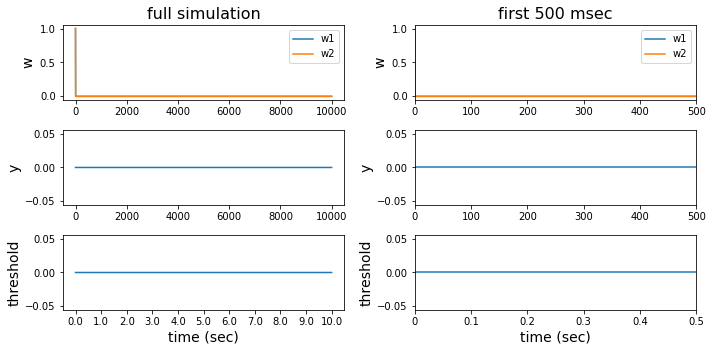

In [5]:
# PLOTTING
# (already implemented, just run)

f = plt.figure(figsize=(10,5))
plt.subplot(3,2,1)
plt.plot(w)
plt.ylabel('w',fontsize=14)
plt.legend(('w1','w2'))
plt.title("full simulation",fontsize=16)
plt.subplot(3,2,2)
plt.plot(w)
plt.ylabel('w',fontsize=14)
plt.legend(('w1','w2'))
plt.title("first 500 msec",fontsize=16)
plt.xlim([0,500])
plt.subplot(3,2,3)
plt.plot(y)
plt.ylabel('y',fontsize=14)
plt.subplot(3,2,4)
plt.plot(y)
plt.ylabel('y',fontsize=14)
plt.xlim([0,500])
plt.subplot(3,2,5)
plt.plot(theta)
plt.ylabel('threshold',fontsize=14)
plt.xlabel('time (sec)',fontsize=14)
plt.xticks(np.linspace(0,10000,11),np.linspace(0,10,11))
plt.subplot(3,2,6)
plt.plot(theta)
plt.xlim([0,500])
plt.ylabel('threshold',fontsize=14)
plt.xlabel('time (sec)',fontsize=14)
plt.xticks(np.linspace(0,500,6),[0,0.1,0.2,0.3,0.4,0.5])
plt.tight_layout()

### 1.4 Spike timing dependent plasticity (programming exercise)

STDP can be implemented online assuming that each presynaptic spike leaves a trace $x$ and each
postsynaptic spike leaves a trace $y$ following the update rules:

$$\tau_x\frac{dx}{dt} = -x + \delta(t-t^{\text{pre}})$$

$$\tau_y\frac{dy}{dt} = -y + \delta(t-t^{\text{post}})$$

The weight change at the synapse is then described by

$$\frac{dw}{dt} = A_+x(t)\delta(t-t^{\text{post}}) - A_-y(t)\delta(t-t^{\text{pre}})$$

Implement a model of a synapse between two neurons with Spike Timing Dependent Plasticity, with $A_+ = A_- = 1$, $\tau_x = 10$ms, $\tau_y = 20$ms, and an initial weight of $1$. Use the Euler method with a time step of $dt=1$ms.

You do not need to model the neurons explicitly -- instead, they can be modelled as Poisson processes, both with a rate $\lambda=20$Hz. This can be easily simulated by generating a potential spike on each time step, with a probability $\lambda dt$ (I've already implemented this for you).

In [6]:
# PARAMETERS AND SETUP
# (already implemented, just run)

A_plus = 1.
A_min = 1.
tau_x = 10.
tau_y = 20.
dt = 1.
T = 1000
rate = 20.0

# modelling the pre and postsynaptic spikes as Poisson processes
x_spikes = np.random.binomial(1,dt*rate/1000,(T,))
y_spikes = np.random.binomial(1,dt*rate/1000,(T,))


In [7]:
# SIMULATE
# (add code to simulate the plasticity dynamics)

w = np.zeros((T,))
x = np.zeros((T,))
y = np.zeros((T,))

for t in range(1,T):
    pass
    

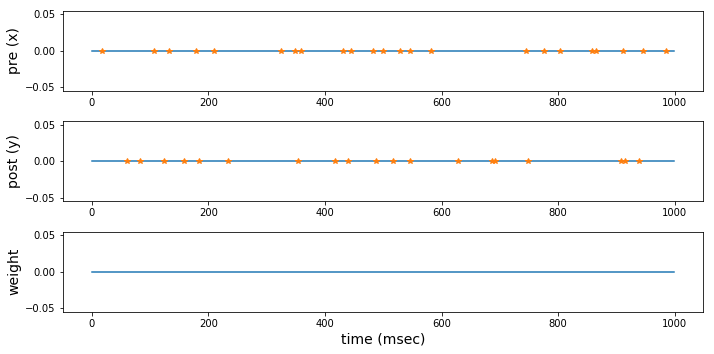

In [8]:
# PLOTTING
# (already implemented, just run)

f = plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.plot(x)
plt.plot(np.where(x_spikes>0)[0],np.zeros((len(np.where(x_spikes>0)[0]))),'*')
plt.ylabel('pre (x)',fontsize=14)
plt.subplot(3,1,2)
plt.plot(y)
plt.plot(np.where(y_spikes>0)[0],np.zeros((len(np.where(y_spikes>0)[0]))),'*')
plt.ylabel('post (y)',fontsize=14)
plt.subplot(3,1,3)
plt.plot(w)
plt.ylabel('weight',fontsize=14)
plt.xlabel('time (msec)',fontsize=14)
plt.tight_layout()